In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/Salary_dataset.csv")
data.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
data.shape

(30, 3)

In [7]:
data.drop("Unnamed: 0",axis=1,inplace=True)


In [9]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [10]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: ylabel='Count'>

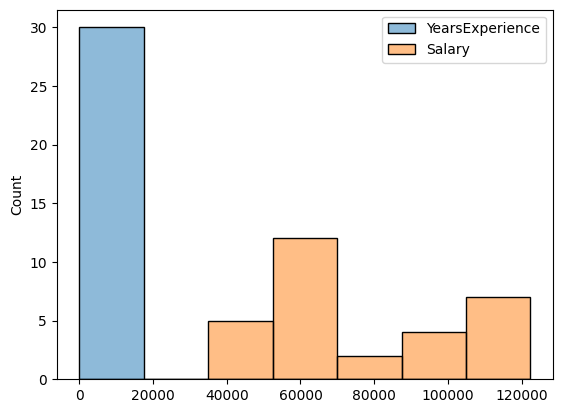

In [16]:
sns.histplot(data)

In [17]:
#outliers

<Axes: ylabel='Salary'>

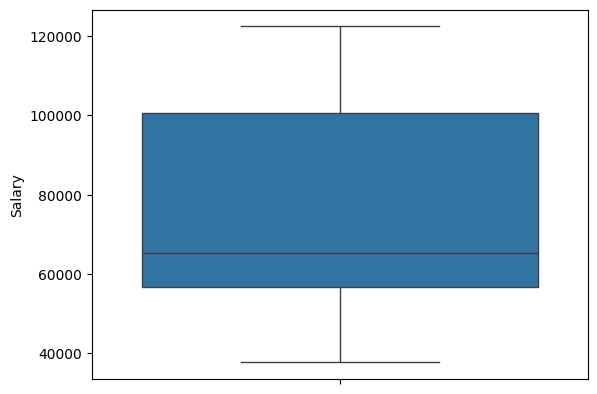

In [18]:
sns.boxplot(data.Salary)

<Axes: ylabel='YearsExperience'>

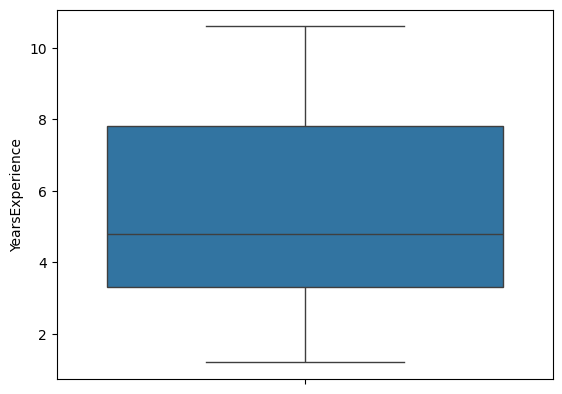

In [19]:
sns.boxplot(data.YearsExperience)

In [22]:
corr_matrix=data.corr()
corr_matrix

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

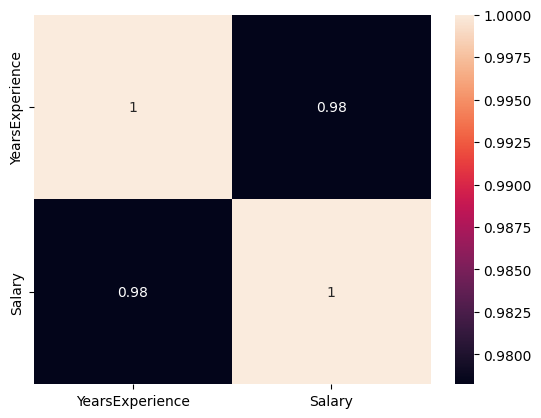

In [24]:
sns.heatmap(corr_matrix,annot=True)

In [25]:

#defining x and y for spliting

x=data.drop('Salary',axis=1)
y=data['Salary']

In [26]:

x.head(3)

,YearsExperience
0,1.2
1,1.4
2,1.6


In [27]:
y.head(3)

0    39344.0
1    46206.0
2    37732.0
Name: Salary, dtype: float64

In [28]:

# splitting


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



#model applying

In [29]:

#Linear regression

from sklearn.linear_model import LinearRegression

lr=LinearRegression()


In [30]:
model_1=lr.fit(x_train,y_train)

In [31]:

y_pred1=model_1.predict(x_test)


In [32]:
y_pred1

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [36]:

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

mean_squared_error(y_test,y_pred1).round(1)

49830096.9

Mean Squared Error (MSE) = 49,830,096.9:

This value represents the average of the squared differences between the actual values and the predicted values by the model.
A higher MSE indicates larger average errors between the predictions and the actual values. In this case, an MSE of 49,830,096.9 suggests that the predictions, on average, are quite far from the actual values, especially since the error is squared, magnifying the impact of larger errors.

In [37]:

r2_score(y_test,y_pred1)

0.9024461774180497

R-squared (R²) Score = 0.90244617741:

The R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
An R² score of 0.90244617741 means that approximately 90.24% of the variance in the target variable is explained by the model. This is generally considered a good fit, indicating that the model explains most of the variability in the target variable.
R² values range from 0 to 1, with higher values indicating better model performance.

High R² and High MSE:
The high R² value suggests that your model explains a large proportion of the variance in the target variable. However, the high MSE indicates that there are significant errors in your predictions.
This combination might occur if the target variable has a large range